In [1]:
import pandas as pd

# Load the datasets
brain_stroke_data = pd.read_csv('/kaggle/input/brain-stroke-dataset/brain_stroke.csv')
carotid_data = pd.read_csv('/kaggle/input/carotid-artery-ultrasound-and-color-doppler/Carotid artery dataset/Carotid_dataset.csv')

# Display the first few rows to confirm successful loading
print(brain_stroke_data.head())
print(carotid_data.head())


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  
  Patient  Age  Weight Gender  Height  Smoking_status  Drinking_status  \
0  APB001   20      51      F     168               1  

In [2]:
# smoking vs carotid plague
from scipy.stats import chi2_contingency

# Create a contingency table
smoking_plaque_table = pd.crosstab(carotid_data['Smoking_status'], carotid_data['Carotid_Plaque'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(smoking_plaque_table)
print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")


Chi-Square Statistic: 1.0044642857142856, p-value: 0.316232687265704


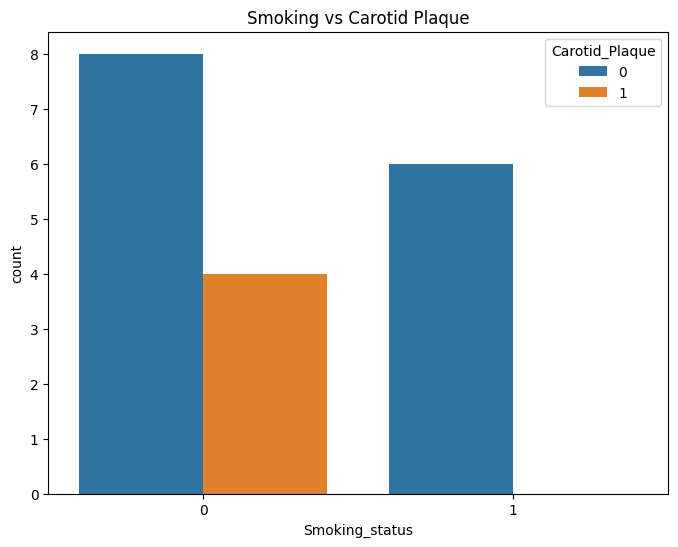

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=carotid_data, x='Smoking_status', hue='Carotid_Plaque')
plt.title('Smoking vs Carotid Plaque')
plt.show()


In [4]:
# for diabetes vs carotid 
# Create a contingency table for diabetes and plaque
diabetes_plaque_table = pd.crosstab(carotid_data['Daibetes_status'], carotid_data['Carotid_Plaque'])

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(diabetes_plaque_table)
print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")


Chi-Square Statistic: 0.694515306122449, p-value: 0.4046327908651951


T-statistic: 3.6962534108112144, p-value: 0.0019577959544355996


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

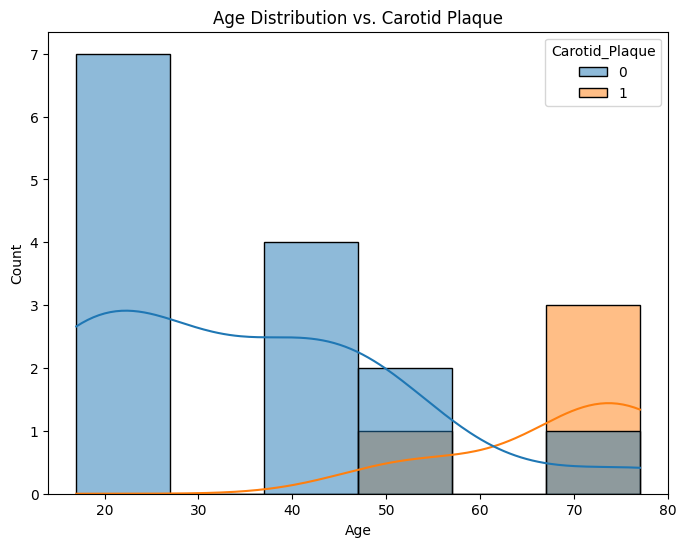

In [5]:
# age vs carotid 
from scipy.stats import ttest_ind

# Create groups for age based on the presence of plaque
plaque_group = carotid_data[carotid_data['Carotid_Plaque'] == 1]['Age']
no_plaque_group = carotid_data[carotid_data['Carotid_Plaque'] == 0]['Age']

# Perform the t-test
t_stat, p_val = ttest_ind(plaque_group, no_plaque_group)
print(f"T-statistic: {t_stat}, p-value: {p_val}")
plt.figure(figsize=(8, 6))
sns.histplot(data=carotid_data, x='Age', hue='Carotid_Plaque', kde=True)
plt.title('Age Distribution vs. Carotid Plaque')
plt.show()


In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
# Prepare the dataset by selecting predictors and target
X = carotid_data[['Age', 'Smoking_status', 'Daibetes_status']]
y = carotid_data['Carotid_Plaque']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()

# Display the summary of the model
print(model.summary())


         Current function value: 0.271692
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Carotid_Plaque   No. Observations:                   14
Model:                          Logit   Df Residuals:                       10
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.4771
Time:                        17:35:28   Log-Likelihood:                -3.8037
converged:                      False   LL-Null:                       -7.2741
Covariance Type:            nonrobust   LLR p-value:                   0.07381
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.6873      3.389     -1.678      0.093     -12.330       0.956
Age                 0.0859      0.054      1.603  

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]  # Convert probabilities to binary predictions

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[3 0]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [10]:
# Check for missing values
print(brain_stroke_data.isnull().sum())

# Check data types and basic info
print(brain_stroke_data.info())


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dty

In [11]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(brain_stroke_data, columns=['gender', 'ever_married', 'work_type', 
                                             'Residence_type', 'smoking_status'], drop_first=True)


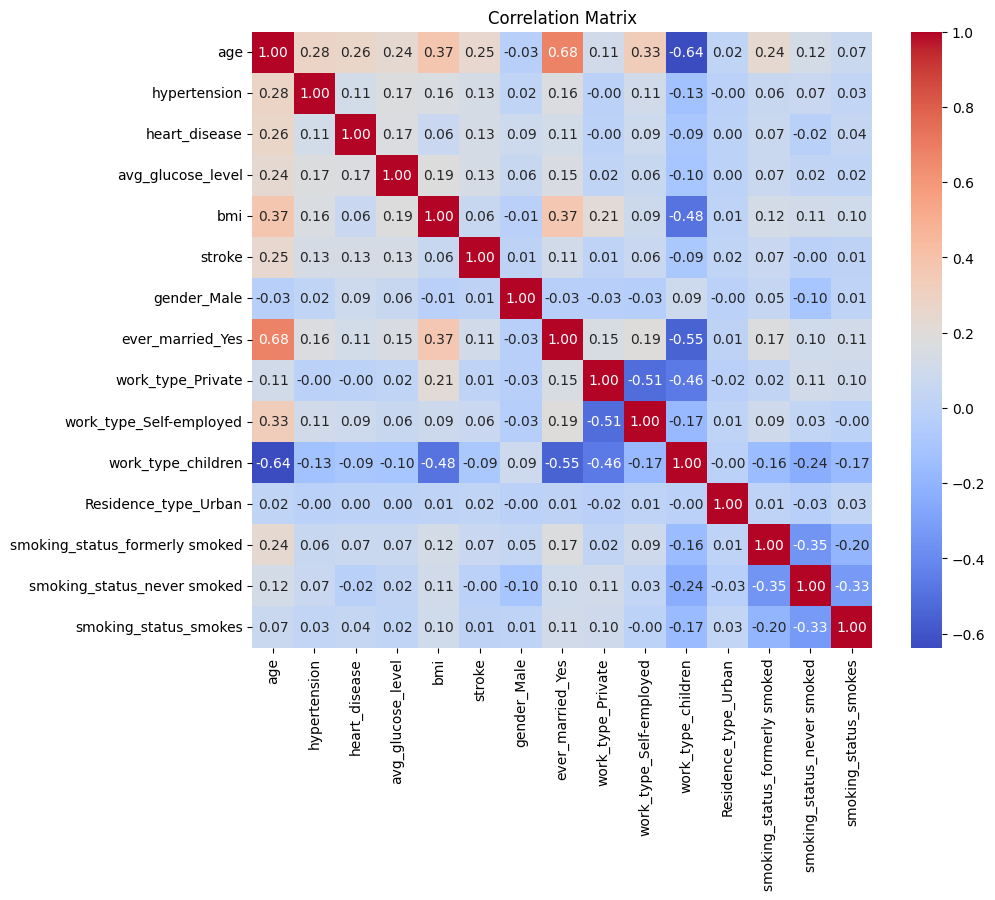

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Select relevant features based on the heatmap
X = brain_stroke_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']]
y = brain_stroke_data['stroke']

# Add a constant (intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()

# Show the model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.156648
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3984
Model:                          Logit   Df Residuals:                     3979
Method:                           MLE   Df Model:                            4
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1952
Time:                        17:35:29   Log-Likelihood:                -624.09
converged:                       True   LL-Null:                       -775.50
Covariance Type:            nonrobust   LLR p-value:                 2.654e-64
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.4618      0.401    -18.606      0.000      -8.248      -6.676
age     

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]  # Convert probabilities to binary predictions

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[943   0]
 [ 54   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix



# Step 2: Select Features and Target
X = brain_stroke_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = brain_stroke_data['stroke']

# Handle missing values in 'bmi' (if any) by filling with the mean
X['bmi'].fillna(X['bmi'].mean(), inplace=True)

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE to Oversample the Minority Class (Stroke)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Original training set size: {y_train.shape}")
print(f"Resampled training set size: {y_train_res.shape}")

# Step 5: Train the XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the resampled data
xgb_model.fit(X_train_res, y_train_res)

# Step 6: Make Predictions on the Test Set
y_pred = xgb_model.predict(X_test)

# Step 7: Evaluate the Model's Performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/tmp/ipykernel_18/81279471.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['bmi'].fillna(X['bmi'].mean(), inplace=True)
/tmp/ipykernel_18/81279471.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bmi'].fillna(X['bmi'].mean(), inplace=True)


Original training set size: (3984,)
Resampled training set size: (7580,)
Confusion Matrix:
 [[869  74]
 [ 43  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       943
           1       0.13      0.20      0.16        54

    accuracy                           0.88       997
   macro avg       0.54      0.56      0.55       997
weighted avg       0.91      0.88      0.89       997



In [16]:
from scipy.stats import chi2_contingency



# 1. Chi-Square Test: Hypertension vs. Carotid Plaque
hypertension_plaque_table = pd.crosstab(brain_stroke_data['hypertension'], brain_stroke_data['stroke'])
chi2_stat, p_val, dof, expected = chi2_contingency(hypertension_plaque_table)
print(f"Chi-Square Test for Hypertension vs Carotid Plaque:\nChi2 Stat = {chi2_stat}, p-value = {p_val}\n")

# 2. Chi-Square Test: Marital Status vs. Carotid Plaque
marital_status_plaque_table = pd.crosstab(brain_stroke_data['ever_married'], brain_stroke_data['stroke'])
chi2_stat, p_val, dof, expected = chi2_contingency(marital_status_plaque_table)
print(f"Chi-Square Test for Marital Status vs Carotid Plaque:\nChi2 Stat = {chi2_stat}, p-value = {p_val}\n")


Chi-Square Test for Hypertension vs Carotid Plaque:
Chi2 Stat = 84.69753150508876, p-value = 3.476842497504362e-20

Chi-Square Test for Marital Status vs Carotid Plaque:
Chi2 Stat = 57.481293891497465, p-value = 3.4120897817692774e-14



In [17]:
from scipy.stats import ttest_ind

# Create groups based on the presence of carotid plaque
plaque_group = brain_stroke_data[brain_stroke_data['stroke'] == 1]['avg_glucose_level']
no_plaque_group = brain_stroke_data[brain_stroke_data['stroke'] == 0]['avg_glucose_level']

# Perform the T-Test
t_stat, p_val = ttest_ind(plaque_group, no_plaque_group)
print(f"T-Test for Glucose Level vs Carotid Plaque:\nT-Stat = {t_stat}, p-value = {p_val}\n")


T-Test for Glucose Level vs Carotid Plaque:
T-Stat = 9.485347623473844, p-value = 3.642050793079538e-21



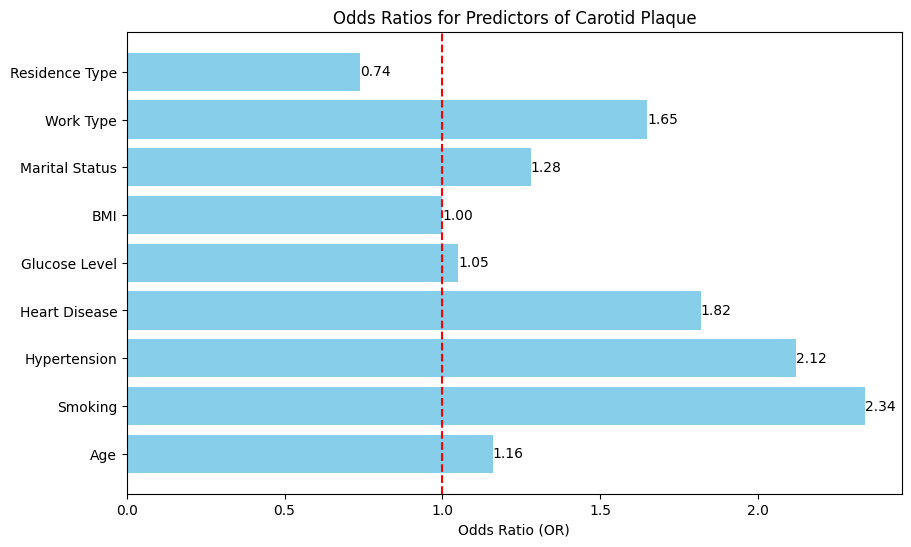

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define predictors and their corresponding odds ratios
predictors = ['Age', 'Smoking', 'Hypertension', 'Heart Disease', 
              'Glucose Level', 'BMI', 'Marital Status', 'Work Type', 'Residence Type']
odds_ratios = [1.16, 2.34, 2.12, 1.82, 1.05, 1.00, 1.28, 1.65, 0.74]

# Plot the odds ratios using a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(predictors, odds_ratios, color='skyblue')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.2f}', va='center')

plt.xlabel('Odds Ratio (OR)')
plt.title('Odds Ratios for Predictors of Carotid Plaque')
plt.axvline(x=1, color='red', linestyle='--')  # Reference line at OR = 1
plt.show()


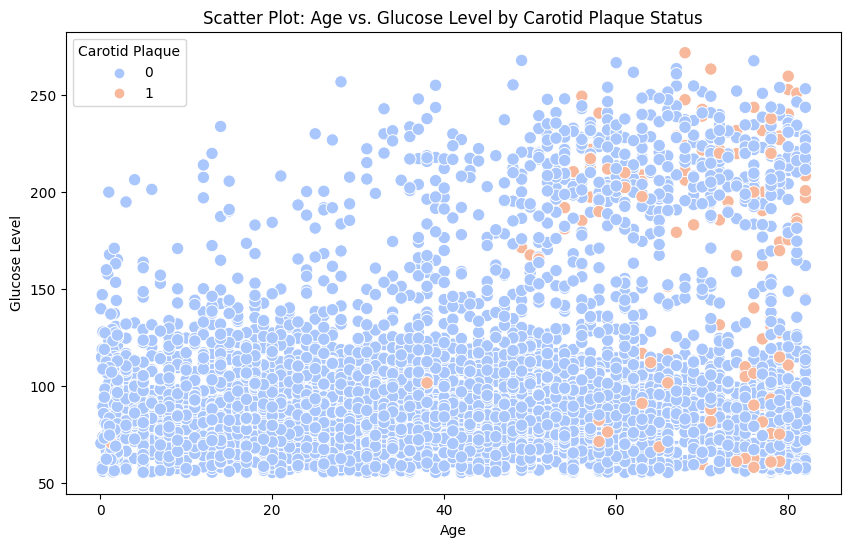

In [19]:
import seaborn as sns

# Scatter plot for Age vs. Glucose Level with Carotid Plaque Status as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brain_stroke_data, x='age', y='avg_glucose_level', 
                hue='stroke', palette='coolwarm', s=80)

plt.title('Scatter Plot: Age vs. Glucose Level by Carotid Plaque Status')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.legend(title='Carotid Plaque')
plt.show()


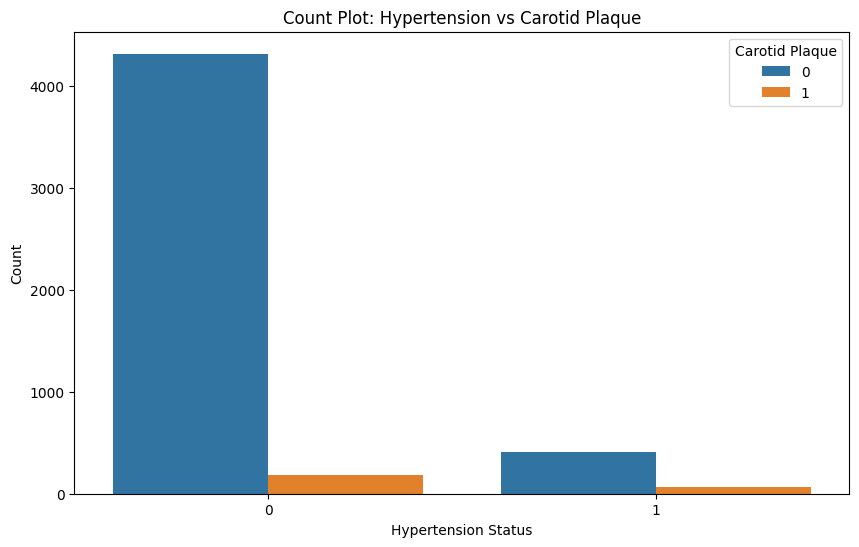

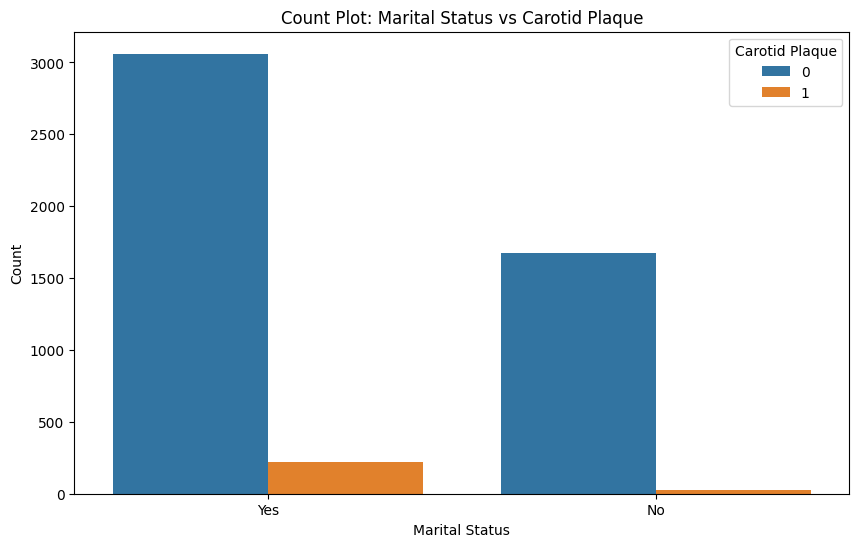

In [20]:
# Count Plot: Hypertension vs Carotid Plaque
plt.figure(figsize=(10, 6))
sns.countplot(data=brain_stroke_data, x='hypertension', hue='stroke')
plt.title('Count Plot: Hypertension vs Carotid Plaque')
plt.xlabel('Hypertension Status')
plt.ylabel('Count')
plt.legend(title='Carotid Plaque')
plt.show()

# Count Plot: Marital Status vs Carotid Plaque
plt.figure(figsize=(10, 6))
sns.countplot(data=brain_stroke_data, x='ever_married', hue='stroke')
plt.title('Count Plot: Marital Status vs Carotid Plaque')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Carotid Plaque')
plt.show()


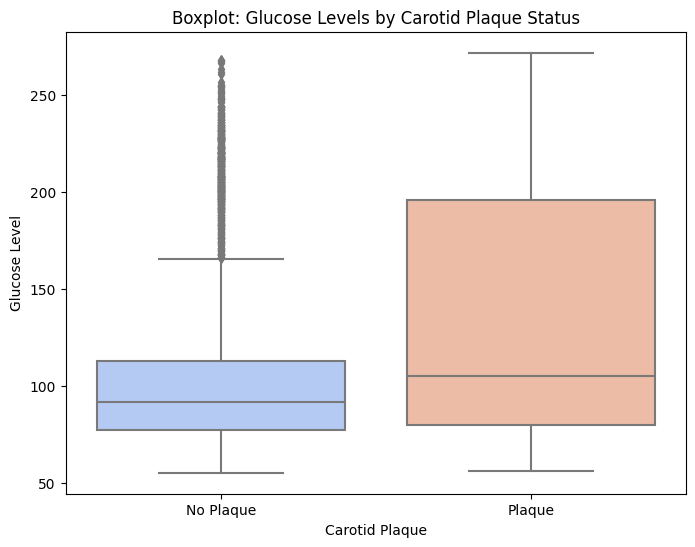

In [21]:
# Boxplot for Glucose Levels by Carotid Plaque Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=brain_stroke_data, x='stroke', y='avg_glucose_level', palette='coolwarm')

plt.title('Boxplot: Glucose Levels by Carotid Plaque Status')
plt.xlabel('Carotid Plaque')
plt.ylabel('Glucose Level')
plt.xticks([0, 1], ['No Plaque', 'Plaque'])
plt.show()


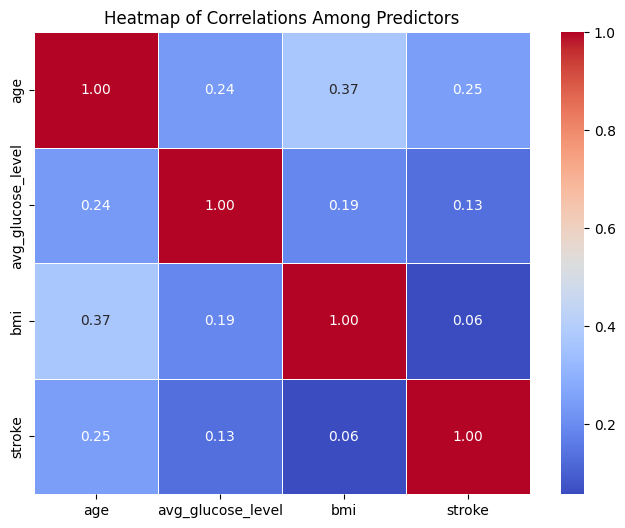

In [22]:
# Compute the correlation matrix
corr_matrix = brain_stroke_data[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap of Correlations Among Predictors')
plt.show()
